In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
#import dataset
comp=pd.read_csv("D:\\zexcelR\\DS Assignments\\Assignment14\\Company_Data.csv")

In [3]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
comp.loc[comp["Sales"] <= 10.00,"Sales1"]="Not High"
comp.loc[comp["Sales"] >= 10.01,"Sales1"]="High"

In [5]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
comp['ShelveLoc']=label_encoder.fit_transform(comp['ShelveLoc'])
comp['Urban']=label_encoder.fit_transform(comp['Urban'])
comp['US']=label_encoder.fit_transform(comp['US'])
comp["Sales1"] = label_encoder.fit_transform(comp["Sales1"])
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [6]:
x=comp.iloc[:,1:11]
y=comp["Sales1"]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [8]:
#Build decision Tree Classifier using entropy criteria
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [9]:
model.get_n_leaves()

8

In [10]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    109
0     51
dtype: int64

In [11]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [12]:
pd.crosstab(y_test,pred)

col_0,0,1
Sales1,,
0,18,16
1,33,93


In [13]:
#Accuracy
np.mean(pred==y_test)

0.69375

In [14]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.53      0.35      0.42        51
           1       0.74      0.85      0.79       109

    accuracy                           0.69       160
   macro avg       0.63      0.60      0.61       160
weighted avg       0.67      0.69      0.67       160



In [15]:
#Build decision tree classifier(CART) based on GINI criteria
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [16]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
model_gini.get_n_leaves()

8

In [18]:
#predict train dataset
pred=model_gini.predict(x_test)
#get count for each category
pd.Series(pred).value_counts()

1    123
0     37
dtype: int64

In [19]:
np.mean(pred==y_test)

0.75625

In [20]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45        37
           1       0.83      0.85      0.84       123

    accuracy                           0.76       160
   macro avg       0.65      0.64      0.65       160
weighted avg       0.75      0.76      0.75       160



In [21]:
#Build Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
Model_R=DecisionTreeRegressor()

In [22]:
Model_R.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
pred=Model_R.predict(x_test)

In [24]:
pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1.])

In [25]:
np.mean(pred==y_test)

0.7

In [26]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.44      0.34      0.38        44
         1.0       0.77      0.84      0.80       116

    accuracy                           0.70       160
   macro avg       0.61      0.59      0.59       160
weighted avg       0.68      0.70      0.69       160



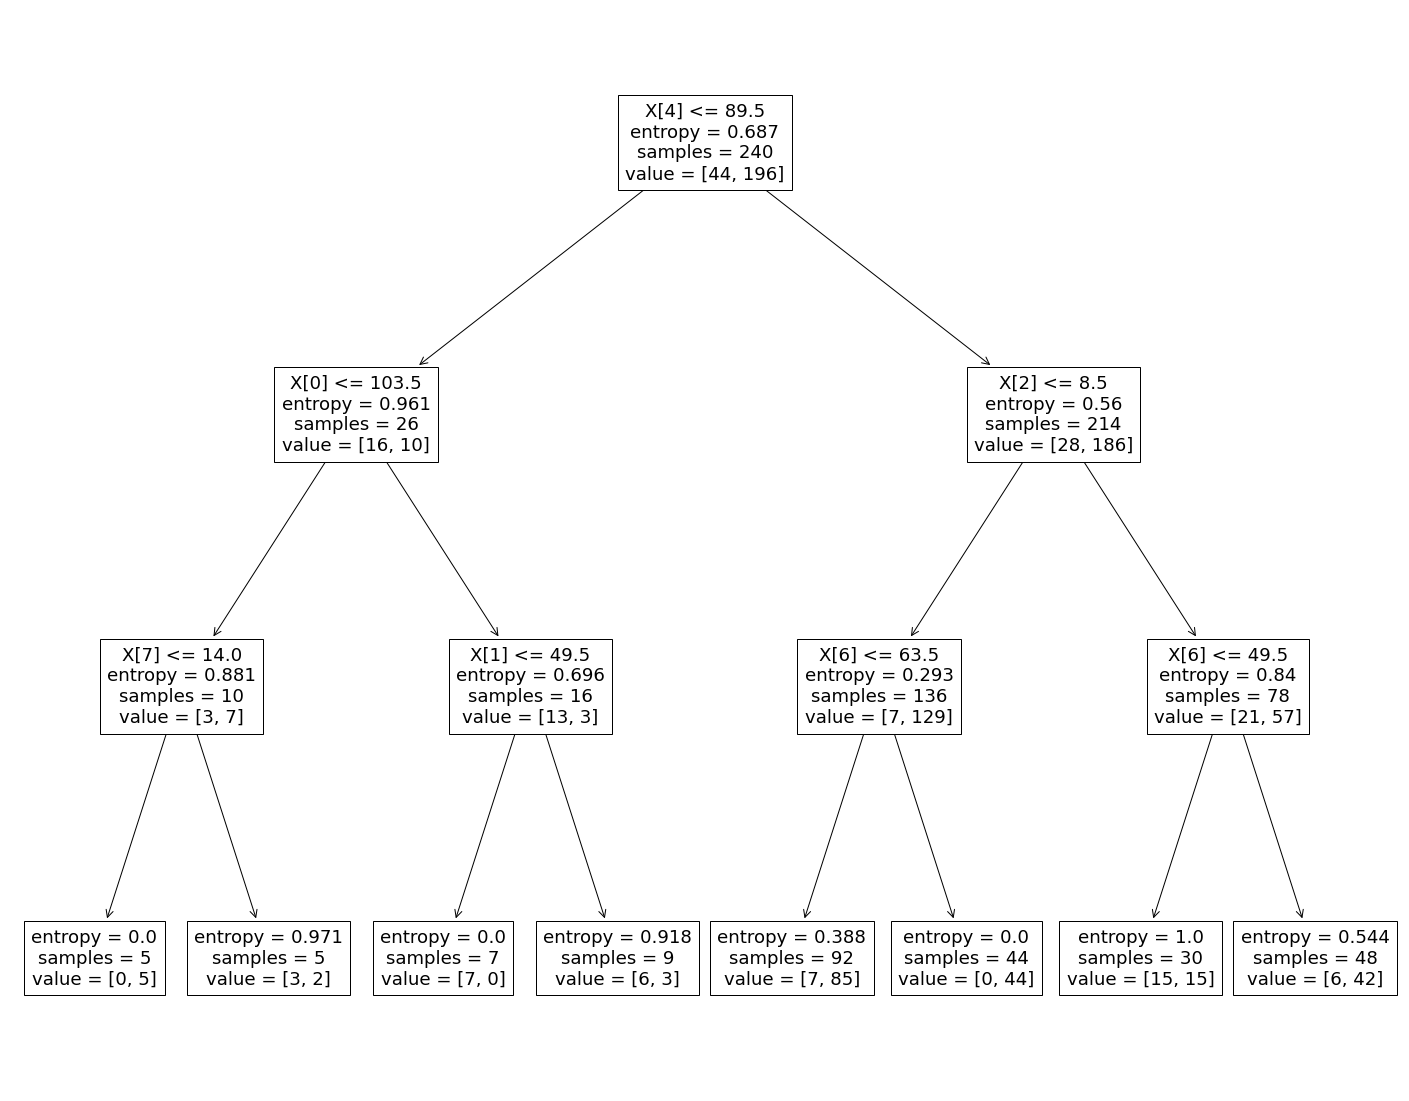

In [27]:
#plot Decision Tree
# Decision Tree Classifier using Entropy Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model)

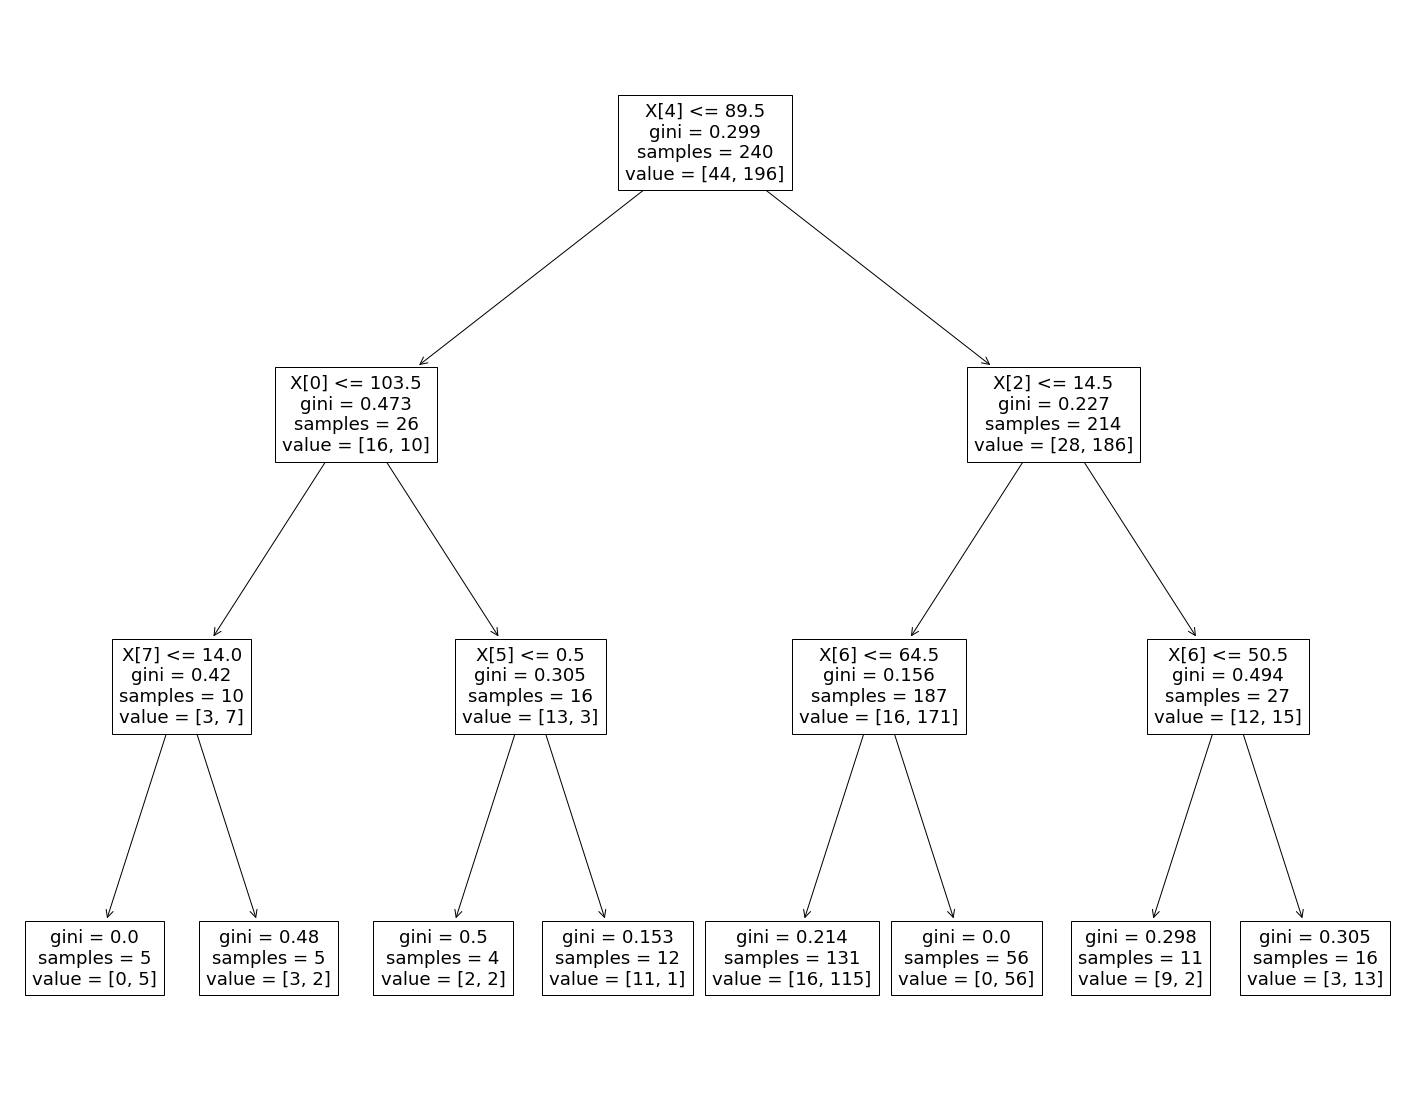

In [28]:
# Decision Tree Classifier (CART) using Gini Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini)

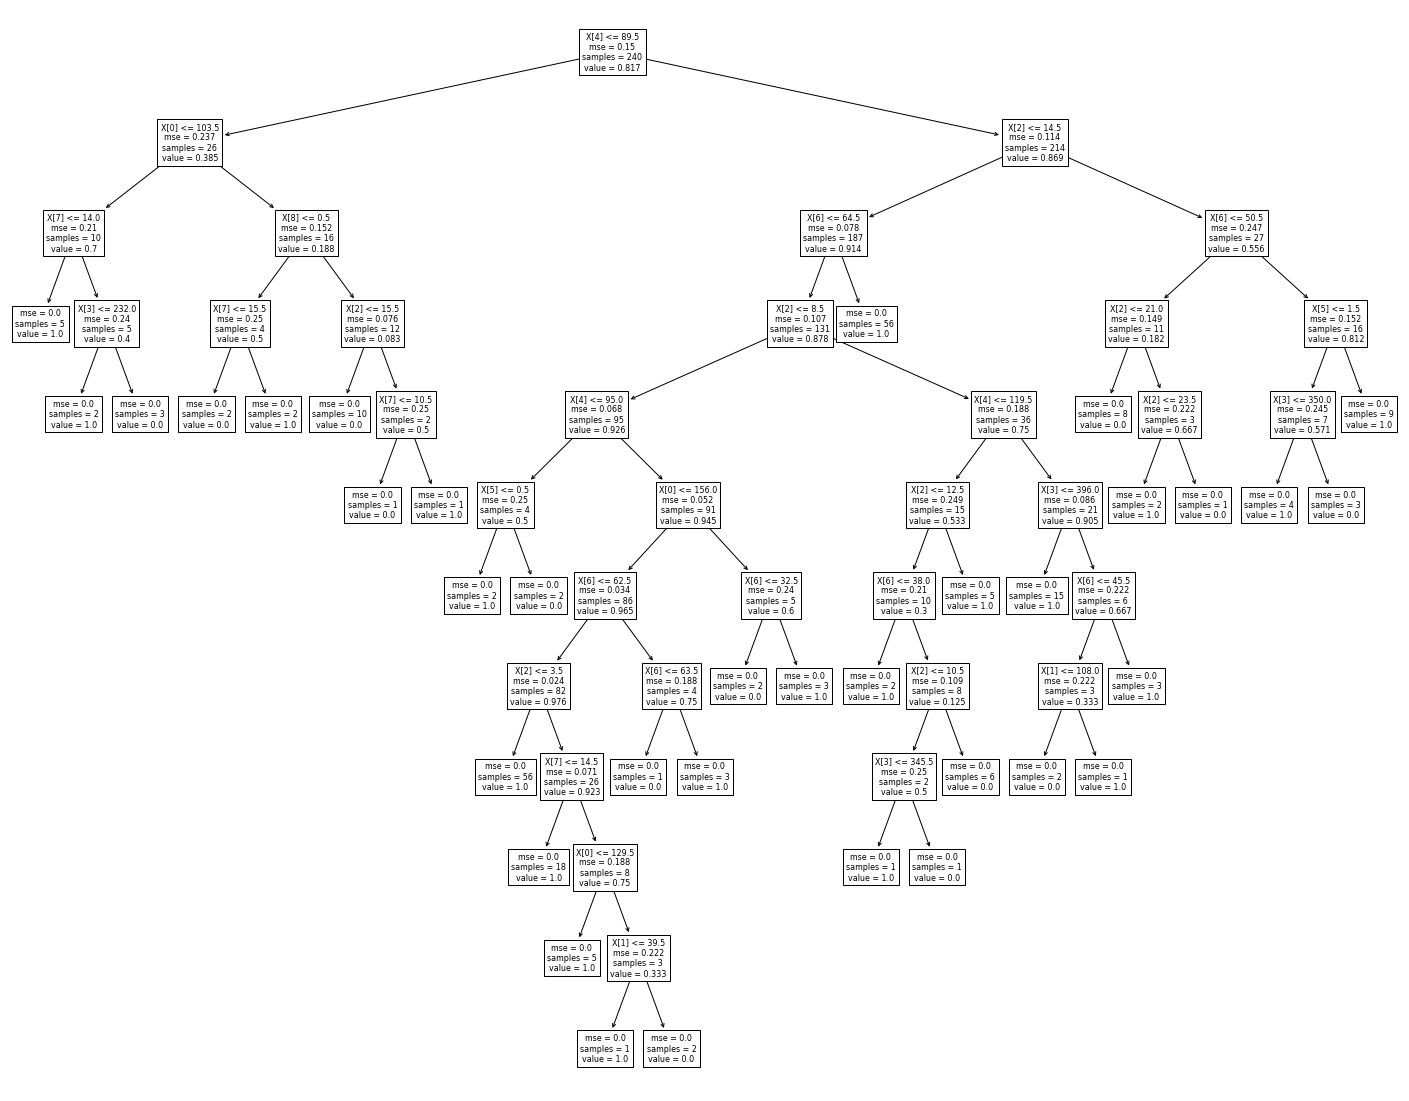

In [29]:
# Decision Tree Regression
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(Model_R)